## WEB SCRAPPING OF AP INDUSTRIES

In [ ]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
url ="https://www.apindustries.gov.in/SPS/UserAccount/LocationMap.aspx"
r=requests.get(url)
print(r.status_code)

200


In [ ]:
soup = BeautifulSoup(r.text, 'html.parser') #parsing
print(soup)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
mydiv = soup.find("div", attrs={"class": "container-fluid"})  #finding the parent div tag
#print(mydiv)

In [ ]:
scripts = mydiv.findAll('script')[1]
print(scripts)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
scripts_Str = scripts.string.strip()
scripts_Str[:1000]

'var markers = [\r\n\r\n            {\r\n            "title": \'Sri padamavathi mechanical works\',\r\n            "lat": \'16.4971132\',\r\n            "lng": \'80.6779712\',\r\n           // "description": \'Krishna\',\r\n           "description": "<table><tr style=\'height:30px;\'><td style=\'width:180px;\'>Industry Name</td><td style=\'width:20px;\'>:</td><td><b>"+\'Sri padamavathi mechanical works\'+"</b></td></tr><tr style=\'height:30px;\'><td>District Name</td><td>:</td><td><b>"+\'Krishna\'+"</b></td></tr><tr style=\'height:30px;\'><td>Sector Name</td><td>:</td><td><b>"+\'SERVICE\'+"</b></td></tr><tr style=\'height:30px;\'><td>Activity Name</td><td>:</td><td><b>"+\'REPAIR AND MAINTENANCE OF BUSES\'+"</b></td></tr><tr style=\'height:30px;\'><td>Industry as per pollution Index Category</td><td>:</td><td><b>"+\'White\'+"</b></td></tr><tr style=\'height:30px;\'><td>Total Workers</td><td>:</td><td><b>"+\'1\'+"</b></td></tr></table><b>",\r\n       "category":\'Micro.png\'       \r\n  

In [ ]:
scripts_Str = scripts_Str.replace('\r\n','')
scripts_Str[:1000]

'var markers = [            {            "title": \'Sri padamavathi mechanical works\',            "lat": \'16.4971132\',            "lng": \'80.6779712\',           // "description": \'Krishna\',           "description": "<table><tr style=\'height:30px;\'><td style=\'width:180px;\'>Industry Name</td><td style=\'width:20px;\'>:</td><td><b>"+\'Sri padamavathi mechanical works\'+"</b></td></tr><tr style=\'height:30px;\'><td>District Name</td><td>:</td><td><b>"+\'Krishna\'+"</b></td></tr><tr style=\'height:30px;\'><td>Sector Name</td><td>:</td><td><b>"+\'SERVICE\'+"</b></td></tr><tr style=\'height:30px;\'><td>Activity Name</td><td>:</td><td><b>"+\'REPAIR AND MAINTENANCE OF BUSES\'+"</b></td></tr><tr style=\'height:30px;\'><td>Industry as per pollution Index Category</td><td>:</td><td><b>"+\'White\'+"</b></td></tr><tr style=\'height:30px;\'><td>Total Workers</td><td>:</td><td><b>"+\'1\'+"</b></td></tr></table><b>",       "category":\'Micro.png\'                  }    ,            {        

In [ ]:
scripts_Str[-100:]

'd>:</td><td><b>"+\'10\'+"</b></td></tr></table><b>",       "category":\'Micro.png\'                  }];'

In [ ]:
scripts_Str = scripts_Str[:-1]+" "+scripts_Str[-1]
scripts_Str[-10:]

'      }] ;'

In [ ]:
pattern = 'var markers = (.*?) ;'
print(pattern)

var markers = (.*?) ;


In [ ]:
p = re.match(pattern, scripts_Str)
print(p)

<re.Match object; span=(0, 33164439), match='var markers = [            {            "title": >


In [ ]:
dataform = str(p.groups()[0]).strip("'<>() ").replace('\'', '\"')
dataform[:1000]

'[            {            "title": "Sri padamavathi mechanical works",            "lat": "16.4971132",            "lng": "80.6779712",           // "description": "Krishna",           "description": "<table><tr style="height:30px;"><td style="width:180px;">Industry Name</td><td style="width:20px;">:</td><td><b>"+"Sri padamavathi mechanical works"+"</b></td></tr><tr style="height:30px;"><td>District Name</td><td>:</td><td><b>"+"Krishna"+"</b></td></tr><tr style="height:30px;"><td>Sector Name</td><td>:</td><td><b>"+"SERVICE"+"</b></td></tr><tr style="height:30px;"><td>Activity Name</td><td>:</td><td><b>"+"REPAIR AND MAINTENANCE OF BUSES"+"</b></td></tr><tr style="height:30px;"><td>Industry as per pollution Index Category</td><td>:</td><td><b>"+"White"+"</b></td></tr><tr style="height:30px;"><td>Total Workers</td><td>:</td><td><b>"+"1"+"</b></td></tr></table><b>",       "category":"Micro.png"                  }    ,            {            "title": "venkatesh mechanical works",          

In [ ]:
dataform=dataform.split("}    ,")
dataform[:3]

['[            {            "title": "Sri padamavathi mechanical works",            "lat": "16.4971132",            "lng": "80.6779712",           // "description": "Krishna",           "description": "<table><tr style="height:30px;"><td style="width:180px;">Industry Name</td><td style="width:20px;">:</td><td><b>"+"Sri padamavathi mechanical works"+"</b></td></tr><tr style="height:30px;"><td>District Name</td><td>:</td><td><b>"+"Krishna"+"</b></td></tr><tr style="height:30px;"><td>Sector Name</td><td>:</td><td><b>"+"SERVICE"+"</b></td></tr><tr style="height:30px;"><td>Activity Name</td><td>:</td><td><b>"+"REPAIR AND MAINTENANCE OF BUSES"+"</b></td></tr><tr style="height:30px;"><td>Industry as per pollution Index Category</td><td>:</td><td><b>"+"White"+"</b></td></tr><tr style="height:30px;"><td>Total Workers</td><td>:</td><td><b>"+"1"+"</b></td></tr></table><b>",       "category":"Micro.png"                  ',
 '            {            "title": "venkatesh mechanical works",          

In [ ]:
dataform=[i.split("            {            ")[1].strip() for i in dataform]
dataform[:5]

['"title": "Sri padamavathi mechanical works",            "lat": "16.4971132",            "lng": "80.6779712",           // "description": "Krishna",           "description": "<table><tr style="height:30px;"><td style="width:180px;">Industry Name</td><td style="width:20px;">:</td><td><b>"+"Sri padamavathi mechanical works"+"</b></td></tr><tr style="height:30px;"><td>District Name</td><td>:</td><td><b>"+"Krishna"+"</b></td></tr><tr style="height:30px;"><td>Sector Name</td><td>:</td><td><b>"+"SERVICE"+"</b></td></tr><tr style="height:30px;"><td>Activity Name</td><td>:</td><td><b>"+"REPAIR AND MAINTENANCE OF BUSES"+"</b></td></tr><tr style="height:30px;"><td>Industry as per pollution Index Category</td><td>:</td><td><b>"+"White"+"</b></td></tr><tr style="height:30px;"><td>Total Workers</td><td>:</td><td><b>"+"1"+"</b></td></tr></table><b>",       "category":"Micro.png"',
 '"title": "venkatesh mechanical works",            "lat": "13.2185764",            "lng": "79.1249472",           // "

In [ ]:
x1 = """<table><tr style="height:30px;"><td style="width:180px;">"""
x2 = """</td><td style="width:20px;">:</td><td><b>"+"""
x3 = """+"</b></td></tr><tr style="height:30px;"><td>"""
x4 = """</td><td>:</td><td><b>"+"""
x5 = """+"</b></td></tr></table><b>"""
dataform=[i.replace(x1," ").replace(x2," ").replace(x3, " ").replace(x4, " ").replace(x5," ") for i in dataform]  #removing the tags in description to clean it
dataform[0]

'"title": "Sri padamavathi mechanical works",            "lat": "16.4971132",            "lng": "80.6779712",           // "description": "Krishna",           "description": " Industry Name "Sri padamavathi mechanical works" District Name "Krishna" Sector Name "SERVICE" Activity Name "REPAIR AND MAINTENANCE OF BUSES" Industry as per pollution Index Category "White" Total Workers "1" ",       "category":"Micro.png"'

In [ ]:
dataform1 = [[j.strip() for j in i.split(",")]for i in dataform]  #splitting a company by type
dataform1[-1]

['"title": "AUTO I SERVICES"',
 '"lat": "15.806686"',
 '"lng": "78.0395258"',
 '// "description": "Kurnool"',
 '"description": " Industry Name "AUTO I SERVICES" District Name "Kurnool" Sector Name "SERVICE" Activity Name "" Industry as per pollution Index Category "Green" Total Workers "10" "',
 '"category":"Micro.png"                  }]']

In [ ]:
df = pd.DataFrame(columns=['Industry Name','Latitude','Longitude','Category', 'District Name','Sector Name','Activity Name','Pollution Index Category','Total Workers'])
df

,Industry Name,Latitude,Longitude,Category,District Name,Sector Name,Activity Name,Pollution Index Category,Total Workers


In [ ]:
for company in dataform1:
  IN = company[0][10:len(company[0])-1]
  LT = company[1][8:len(company[1])-1]
  LN = company[2][8:len(company[2])-1]
  CT = company[-1][12:len(company[-1])-5]
  des = list(filter(("").__ne__,company[4].split("\"")[3:-2]))
  print(des)
  DN = des[3]
  if len(des)== 4:
      des.append('NA')
      des.append('NA')
  SN = des[5]
  if len(company)>6:
      a = list(filter(("").__ne__,company[5].split("\"")[0:1]))
      b = list(filter(("").__ne__,company[5].split("\"")[2:3]))
      if len(b) == 0:
          b.append('NA')
      c = list(filter(("").__ne__,company[5].split("\"")[3:-2]))
      if len(c) < 2:
          c.append('NA')
          c.append('NA')
    #   print(c)
      AN = a[0]
      PI = b[0]
      TW = c[1]
  else:
    AN = des[7]
    PI = des[9]
    if len(des) == 11:
        des.append('NA')
    TW = des[11]
  df = df.append({'Industry Name' : IN, 'Latitude' : LT, 'Longitude' : LN,'District Name' :DN,'Sector Name':SN,'Activity Name':AN,'Pollution Index Category':PI,'Category':CT,'Total Workers':TW},  
                ignore_index = True)

Streaming output truncated to the last 5000 lines.
[' Industry Name ', 'KALPANA STONE CRUSHER INDUSTRY 0546 HA', ' District Name ', 'Guntur', ' Sector Name ', 'Non Mettalic Mineral', ' Activity Name ', 'STONE CRUSHER', ' Industry as per pollution Index Category ', 'White', ' Total Workers ', '5']
[' Industry Name ', 'SRI HARI STONE CRUSHER', ' District Name ', 'Kadapa', ' Sector Name ', 'Non Mettalic Mineral', ' Activity Name ', 'STONE CRUSHER', ' Industry as per pollution Index Category ', 'Green', ' Total Workers ', '1']
[' Industry Name ', 'Sri Chaitanya stone crusher', ' District Name ', 'Guntur', ' Sector Name ', 'Non Mettalic Mineral', ' Activity Name ', 'STONE CRUSHER', ' Industry as per pollution Index Category ', 'Green', ' Total Workers ', '1']
[' Industry Name ', 'HAMEED MINERALS', ' District Name ', 'Anantapur', ' Sector Name ', 'Non Mettalic Mineral', ' Activity Name ', 'STONE CRUSHER', ' Industry as per pollution Index Category ', 'Green', ' Total Workers ', '5']
[' Indus

In [ ]:
df.head()

,Industry Name,Latitude,Longitude,Category,District Name,Sector Name,Activity Name,Pollution Index Category,Total Workers
0,Sri padamavathi mechanical works,16.4971132,80.6779712,Micro,Krishna,SERVICE,REPAIR AND MAINTENANCE OF BUSES,White,1
1,venkatesh mechanical works,13.2185764,79.1249472,Micro,Chittoor,SERVICE,REPAIR AND MAINTENANCE OF BUSES,Green,1
2,N Nagaraju Transformers,14.4516162,78.8407888,Micro,Kadapa,SERVICE,Generators and Transformers,Green,4
3,Sai Kala Beauty Parlor,14.4722303,78.8370464,Micro,Kadapa,SERVICE,Salon Services,White,1
4,AMBIKA WEIGH BRIDGE,14.8643593,78.3947098,Micro,Kadapa,SERVICE,Service,Green,1


In [ ]:
df.shape

(36125, 9)

In [ ]:
#df.to_csv('AP_Industries_location.csv')

In [ ]:
list(df)

['Industry Name',
 'Latitude',
 'Longitude',
 'Category',
 'District Name',
 'Sector Name',
 'Activity Name',
 'Pollution Index Category',
 'Total Workers']

In [ ]:
df = pd.read_csv("AP Industries_Web_Scrapping.csv")
df.head()

FileNotFoundError: ignored

In [ ]:
df['cap_Latitude'] = 17.6868
df['cap_Longitude'] = 83.2185

In [ ]:
! pip install haversine
from haversine import haversine

loc1 = list(zip(df.Latitude, df.Longitude))
loc2 = list(zip(df.cap_Latitude, df.cap_Longitude))
df['distance_from_cap'] = ''
for ind in df.index: 
     df['distance_from_cap'].values[ind] = haversine(loc1[ind], loc2[ind])
#df.head()

list(df)

In [ ]:
# Converting data type of distance_from_capital from object to float64
df['distance_from_cap']= pd.to_numeric(df['distance_from_cap'])
df['distance_from_cap'].describe().round(2)

In [ ]:
df.info()

In [ ]:
df.describe()

## Handling Missing values

In [ ]:
print(df['Category'].unique())

['Micro' 'Small' 'Large' nan 'Medium' 'Mega' 'Large.png"               ']


In [ ]:
df['Category'] = df['Category'].replace('Large.png"               ', 'Large')
df['Category'] = df['Category'].fillna("NA")
print(df['Category'].unique())

['Micro' 'Small' 'Large' 'NA' 'Medium' 'Mega']


In [ ]:
df.groupby('Category').size()

Category
Large       367
Medium      435
Mega          5
Micro     33316
NA           45
Small      2095
dtype: int64

In [ ]:
# Replacing with NA values with micro (selected based on mode)
df['Category'] = df['Category'].replace('NA', 'Micro')
print(df['Category'].unique())

['Micro' 'Small' 'Large' 'Medium' 'Mega']


In [ ]:
print(df['District Name'].unique())

['Krishna' 'Chittoor' 'Kadapa' 'Srikakulam' 'Vizianagaram' 'Anantapur'
 'Guntur' 'Visakhapatnam' 'West Godavari' 'East Godavari' 'Prakasam'
 'Kurnool' 'S.P.S.R. Nellore']


In [ ]:
df.groupby('Sector Name').size()

Sector Name
AUTO COMPONENTS                      882
Aqua Marine                          321
BRICKS                              1400
Basic Metals & Alloy Industries      448
CHEMICAL                              86
COIR                                 242
COIR BASED                           204
COLD STORAGES                        373
Chemical & Petro Chemicals           248
Defence and Aero                       4
Drugs and Pharma                     133
ELECTRICAL& ELECTRONICS              344
ENGINEERING                         2473
Fertilizers & Pesticides              82
Food and Agro Products             10395
GINNING                               83
GRANITE                             1052
Glass & Ceramics                      88
HERBAL PRODUCTS                       45
IT                                    25
JUTE                                  30
LEAF PLATES                           52
LEATHER                               22
LEATHER BASED                         20
MDF 

In [ ]:
# Pulp industry consists of packaging industry and other service providing shops, so replacing with service
df.loc[df['Activity Name'] == 'Pulp', 'Sector Name'] = "SERVICE"

# Plastic industry consists manufacturing of plastic products, so replacing with Engineering.
df.loc[df['Activity Name'] ==  'Plastics', 'Sector Name'] = "ENGINEERING"

In [ ]:
print(df['Activity Name'].unique())

['REPAIR AND MAINTENANCE OF BUSES' 'Generators and Transformers'
 'Salon Services' ... 'Coconut Coir and Pith extraction' 'COCONUT FIBRE'
 ' Industry as per pollution Index Category ']


In [ ]:
df['Activity Name'] = df['Activity Name'].replace([' Total Workers ', ' Industry as per pollution Index Category '], 
                                                  'AUTOMOBILE SERVICING')
print((df['Activity Name'].unique()))

['REPAIR AND MAINTENANCE OF BUSES' 'Generators and Transformers'
 'Salon Services' ... 'Manufacturing of coir items from coconut husk'
 'Coconut Coir and Pith extraction' 'COCONUT FIBRE']


In [ ]:
df['Activity Name'] = df['Activity Name'].replace('NA', 'AUTOMOBILE SERVICING')
print(df['Activity Name'].unique())

['REPAIR AND MAINTENANCE OF BUSES' 'Generators and Transformers'
 'Salon Services' ... 'Manufacturing of coir items from coconut husk'
 'Coconut Coir and Pith extraction' 'COCONUT FIBRE']


In [ ]:
print(df['Pollution Index Category'].unique())
df.groupby('Pollution Index Category').size()

['White' 'Green' 'Orange' 'Red' nan ' Total Workers ']


Pollution Index Category
 Total Workers         1
Green              21649
Orange              2278
Red                  435
White               8498
dtype: int64

In [ ]:
df['Pollution Index Category'] = df['Pollution Index Category'].replace(' Total Workers ', 'NA')
df['Pollution Index Category'] = (df['Pollution Index Category'].fillna("Green"))
print(df['Pollution Index Category'].unique())

['White' 'Green' 'Orange' 'Red' 'NA']


In [ ]:
df['Pollution Index Category'] = df['Pollution Index Category'].replace('NA', 'Green')
print(df['Pollution Index Category'].unique())

['White' 'Green' 'Orange' 'Red']


In [ ]:
df['Total Workers'].describe().round(1)

count    32827.0
mean         4.9
std         24.4
min          1.0
25%          1.0
50%          2.0
75%          4.0
max       1026.0
Name: Total Workers, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([3.2516e+04, 1.2500e+02, 7.8000e+01, 2.7000e+01, 2.2000e+01,
        1.1000e+01, 9.0000e+00, 8.0000e+00, 9.0000e+00, 7.0000e+00,
        1.0000e+00, 2.0000e+00, 2.0000e+00, 3.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([1.0000e+00, 5.2250e+01, 1.0350e+02, 1.5475e+02, 2.0600e+02,
        2.5725e+02, 3.0850e+02, 3.5975e+02, 4.1100e+02, 4.6225e+02,
        5.1350e+02, 5.6475e+02, 6.1600e+02, 6.6725e+02, 7.1850e+02,
        7.6975e+02, 8.2100e+02, 8.7225e+02, 9.2350e+02, 9.7475e+02,
        1.0260e+03]),
 <a list of 20 Patch objects>)

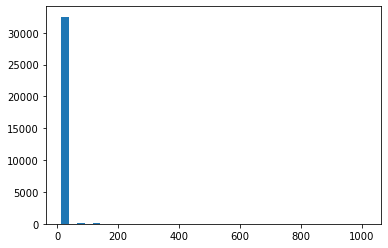

In [ ]:
plt.hist(df['Total Workers'], bins = 20, rwidth = 0.5)

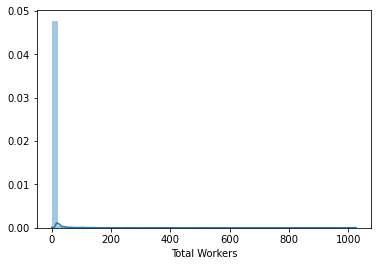

In [ ]:
sns.distplot(df['Total Workers'])

In [ ]:
# replacing with nan values with mean (5)
df['Total Workers'] = df['Total Workers'].fillna(5)
print(df['Total Workers'])

0          1.0
1          1.0
2          4.0
3          1.0
4          1.0
         ...  
36258      5.0
36259      5.0
36260      1.0
36261      1.0
36262    108.0
Name: Total Workers, Length: 36263, dtype: float64


In [ ]:
df.isnull().sum()

Unnamed: 0                  0
Industry Name               0
Latitude                    0
Longitude                   0
Category                    0
District Name               0
Sector Name                 0
Activity Name               0
Pollution Index Category    0
Total Workers               0
cap_Latitude                0
cap_Longitude               0
distance_from_cap           0
dtype: int64

In [ ]:
df.describe()

,Unnamed: 0,Latitude,Longitude,Category,District Name,Sector Name,Pollution Index Category,Total Workers,cap_Latitude,cap_Longitude,distance_from_cap
count,36263.000000,36263.000000,36263.000000,36263.000000,36263.000000,36263.000000,36263.000000,36263.000000,3.626300e+04,3.626300e+04,36263.000000
mean,18131.000000,15.747823,80.480353,3.003282,5.186306,19.518242,0.789841,4.905441,1.768680e+01,8.321850e+01,387.742919
std,10468.370742,1.637385,1.810676,0.443816,3.937355,9.853423,1.263364,23.231649,1.362840e-11,3.278489e-11,227.520202
min,0.000000,11.019152,22.904390,0.000000,0.000000,0.000000,0.000000,1.000000,1.768680e+01,8.321850e+01,0.252736
25%,9065.500000,14.447484,79.549280,3.000000,1.000000,14.000000,0.000000,1.000000,1.768680e+01,8.321850e+01,188.903988
50%,18131.000000,16.181870,80.154895,3.000000,5.000000,14.000000,0.000000,2.000000,1.768680e+01,8.321850e+01,365.776732
75%,27196.500000,16.886886,81.706313,3.000000,9.000000,29.000000,1.000000,5.000000,1.768680e+01,8.321850e+01,613.142278
max,36262.000000,47.794605,84.718658,4.000000,12.000000,34.000000,3.000000,1026.000000,1.768680e+01,8.321850e+01,6357.982605


## Data Visualization

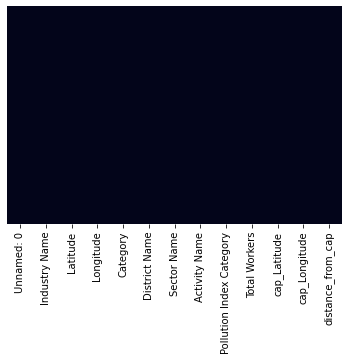

In [ ]:
# Finding NA values visually
sns.heatmap(df.isnull(), yticklabels= False, cbar=False)

[367, 33361, 5, 2095, 435]


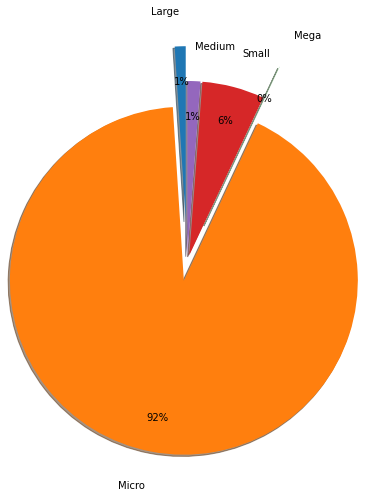

In [ ]:
feature_cg = ['Large', 'Micro', 'Mega', 'Small', 'Medium']
count_cg = []
for catg in feature_cg:
    catg = df.loc[df['Category'] == catg].count()[0]
    count_cg.append(catg)
    
print(count_cg)

explode = [0.5, 0.2, 0.5, 0.1, 0.1 ]

plt.pie(count_cg, labels = feature_cg, autopct = '%1.0f%%',
                        startangle = 90, explode = explode, shadow = True,
                         pctdistance=0.8 , labeldistance= 1.2, radius = 2)
plt.show()

Text(0.5, 1.0, 'Total Number of Categories in AP')

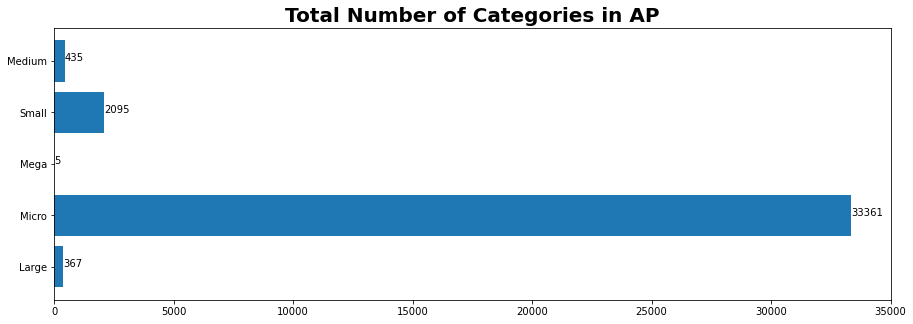

In [ ]:
plt.figure(figsize=(15,5))
plt.barh(feature_cg, count_cg)

for index, value in enumerate(count_cg):
    plt.text(value, index, str(value))
    
plt.title('Total Number of Categories in AP', fontsize=20, fontweight='bold')

Text(0.5, 1.0, 'Number of Industries in each Districts')

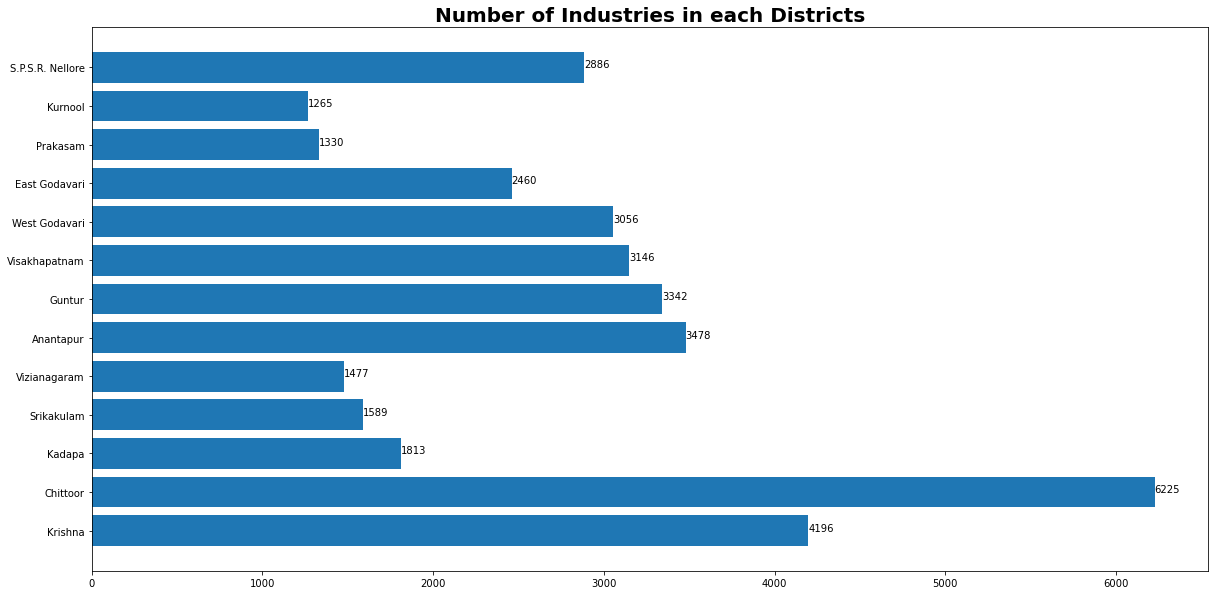

In [ ]:
feature_dst = list(df['District Name'].unique())
count_dst = []
for name in feature_dst:
    name = df.loc[df['District Name'] == name].count()[0]
    count_dst.append(name)
    
#print(count)

plt.figure(figsize=(20,10))
plt.barh(feature_dst, count_dst)

for index, value in enumerate(count_dst):
    plt.text(value, index, str(value))
    
plt.title('Number of Industries in each Districts', fontsize=20, fontweight='bold')

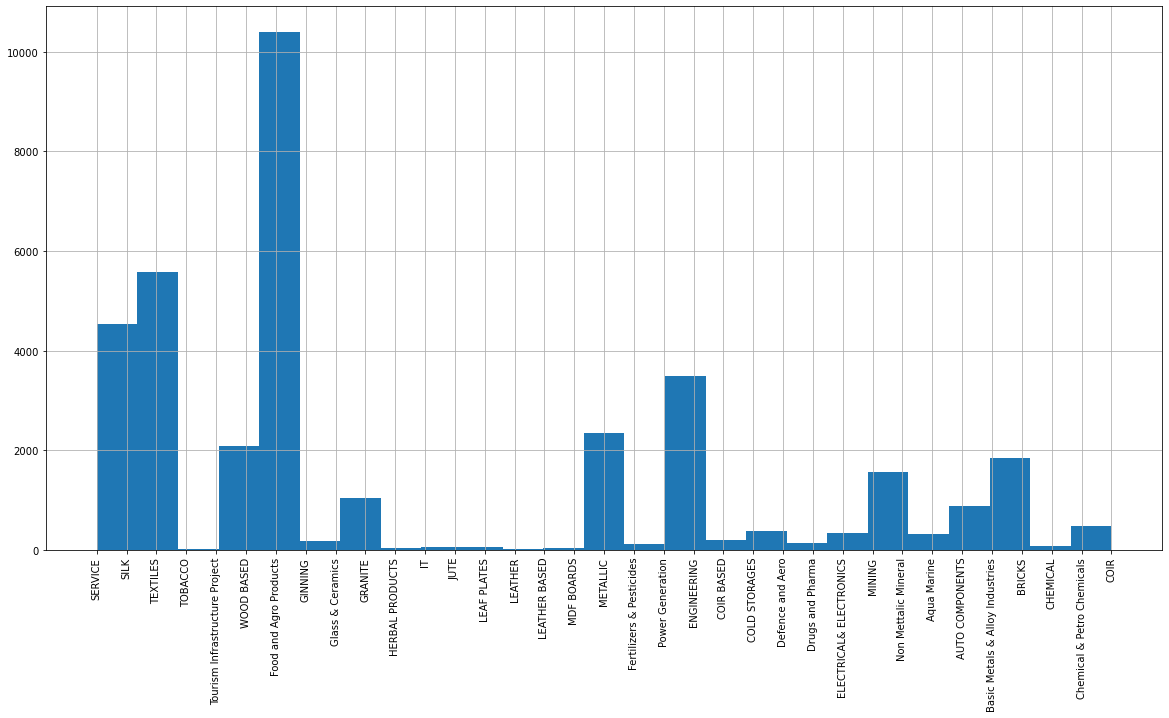

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
df['Sector Name'].hist(bins=25)

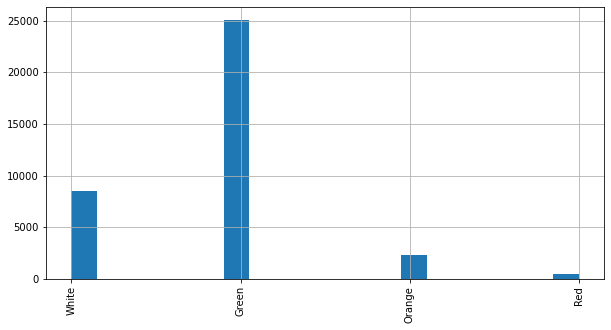

In [ ]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
df['Pollution Index Category'].hist(bins=20, rwidth=1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

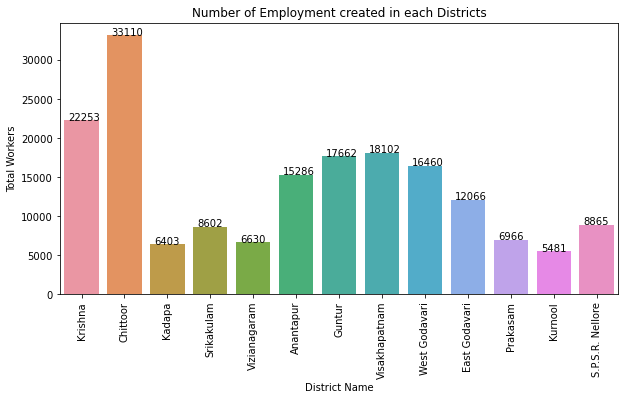

In [ ]:
plt.figure(figsize=(10,5))
ax1 = sns.barplot(x='District Name',y='Total Workers', data=df, estimator = np.sum, ci = None)
ax1.set_title('Number of Employment created in each Districts')
for p in ax1.patches:
        ax1.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
        
plt.xticks(rotation=90)

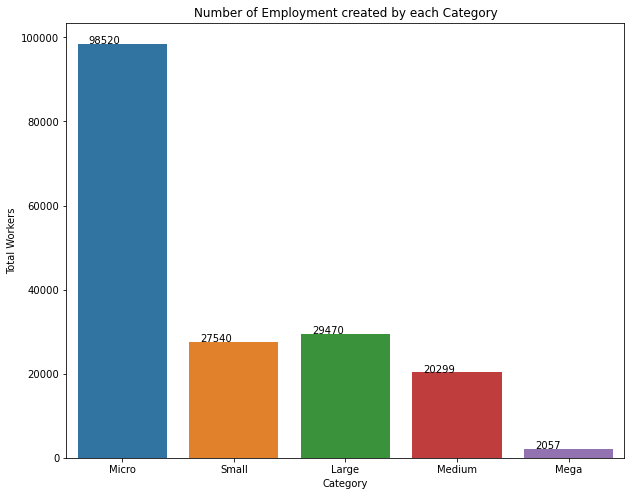

In [ ]:
plt.figure(figsize=(10,8))
ax2 = sns.barplot(x='Category',y='Total Workers', data=df, estimator = np.sum, ci = None)
ax2.set_title('Number of Employment created by each Category')
for p in ax2.patches:
        ax2.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

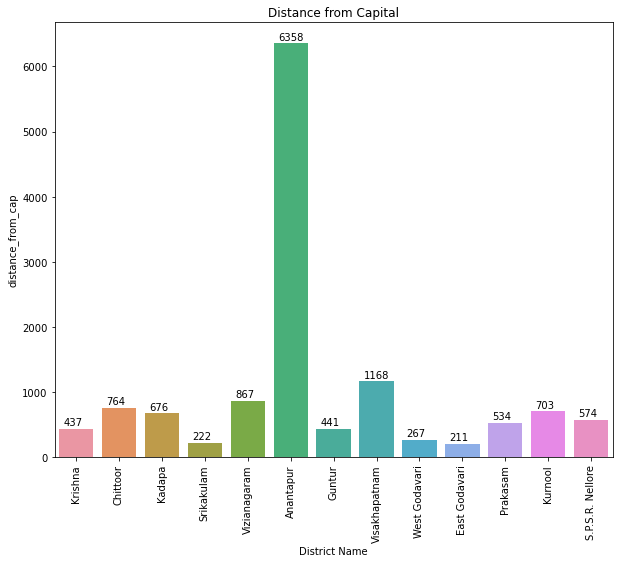

In [ ]:
plt.figure(figsize=(10,8))
ax3 = sns.barplot(x='District Name',y='distance_from_cap', data=df, estimator = np.max, ci = None)
ax3.set_title('Distance from Capital')
for p in ax3.patches:
        ax3.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.xticks(rotation=90)

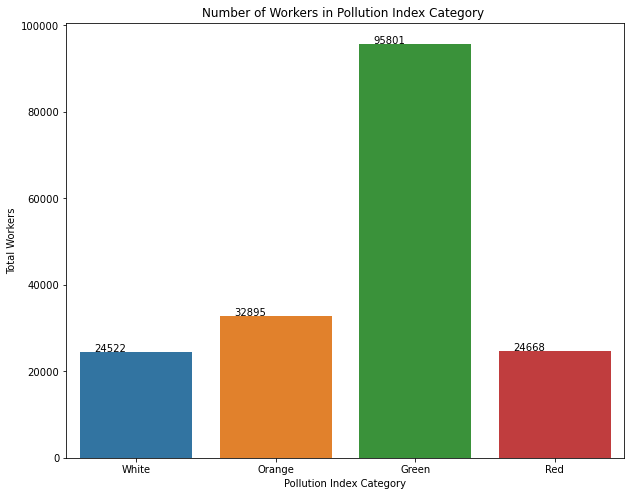

In [ ]:
plt.figure(figsize=(10,8))
ax4 = sns.barplot(x='Pollution Index Category',y='Total Workers', data=df, estimator = np.sum, ci = None,
                 order = ['White', 'Orange', 'Green', 'Red']
                 )
ax4.set_title('Number of Workers in Pollution Index Category ')
for p in ax4.patches:
        ax4.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

Text(0.5, 1.0, 'Districts with Pollution Index Category and Workers')

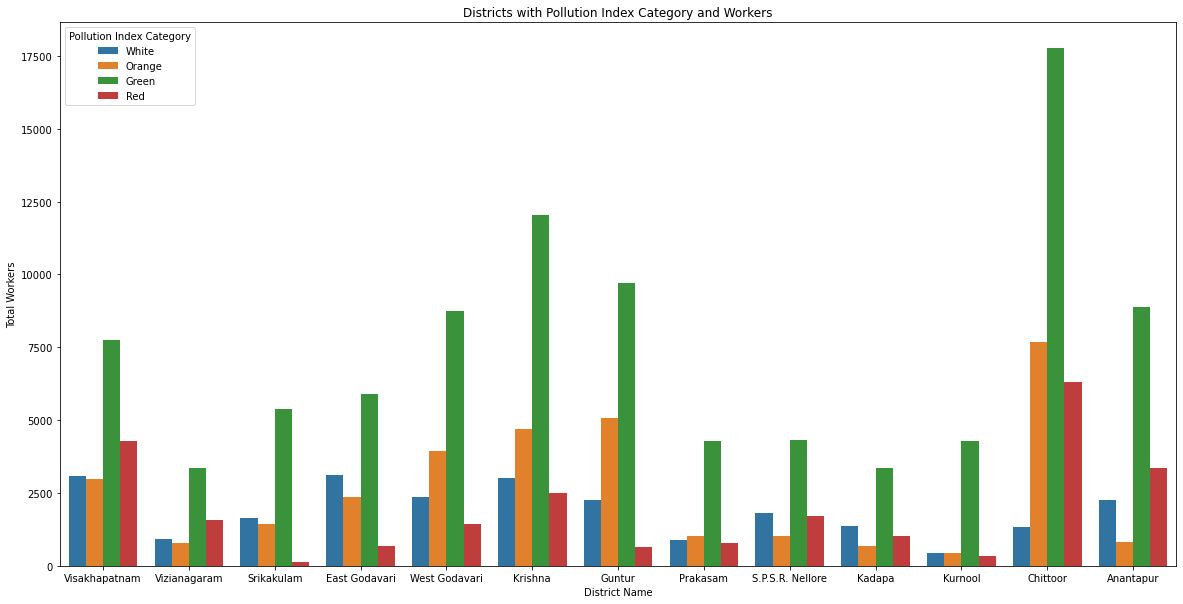

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax5 = sns.barplot(x= "District Name", y= "Total Workers", data= df, hue= 'Pollution Index Category', estimator = np.sum, ci = None,
           order = ['Visakhapatnam', 'Vizianagaram', 'Srikakulam', 'East Godavari', 'West Godavari', 'Krishna', 'Guntur', 'Prakasam', 'S.P.S.R. Nellore', 'Kadapa', 'Kurnool', 'Chittoor', 'Anantapur'],
                  hue_order = ['White', 'Orange', 'Green', 'Red']
           )
ax5.set_title('Districts with Pollution Index Category and Workers')

Text(0.5, 1.0, 'Districts with Categories and Total Workers')

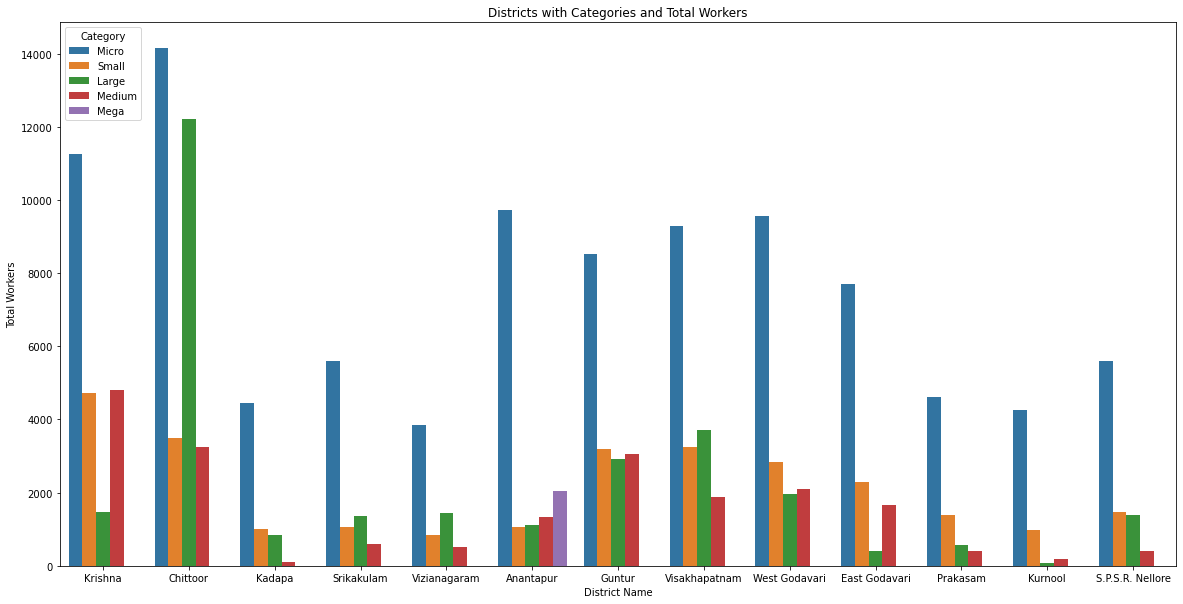

In [ ]:
plt.figure(figsize=(20, 10))
ax6 = sns.barplot(x= "District Name", y= "Total Workers", data= df, hue= 'Category', estimator = np.sum, ci = None,
           )
ax6.set_title('Districts with Categories and Total Workers')

## Data Preprocessing

In [ ]:
# Label encoding for category, District name, Sector name and Pollution Index category.
# For Activity name- LE is not done as it is derived from Sector name

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['Category']  = LE.fit_transform(df['Category'])
#df['Category'].dtype

df['District Name']  = LE.fit_transform(df['District Name'])                                    

df['Sector Name']  = LE.fit_transform(df['Sector Name'])

df['Pollution Index Category'] = LE.fit_transform(df['Pollution Index Category']).astype(float)
#df['Pollution Index Category'].dtype

df.head()


,Unnamed: 0,Industry Name,Latitude,Longitude,Category,District Name,Sector Name,Activity Name,Pollution Index Category,Total Workers,cap_Latitude,cap_Longitude,distance_from_cap
0,0,Sri padamavathi mechanical works,16.497113,80.677971,3,5,29,REPAIR AND MAINTENANCE OF BUSES,3.0,1.0,17.6868,83.2185,300.674442
1,1,venkatesh mechanical works,13.218576,79.124947,3,1,29,REPAIR AND MAINTENANCE OF BUSES,0.0,1.0,17.6868,83.2185,662.730194
2,2,N Nagaraju Transformers,14.451616,78.840789,3,4,29,Generators and Transformers,0.0,4.0,17.6868,83.2185,590.024981
3,3,Sai Kala Beauty Parlor,14.472230,78.837046,3,4,29,Salon Services,3.0,1.0,17.6868,83.2185,588.929409
4,4,AMBIKA WEIGH BRIDGE,14.864359,78.394710,3,4,29,Service,0.0,1.0,17.6868,83.2185,602.930016


In [ ]:
'''
Removing location coordinates of districts and capital
Industry names as these not required.
Activity name as these are devired from sector names.
'''

df1 = df.drop(['Unnamed: 0', 'Industry Name', 'Latitude', 'Longitude', 'cap_Latitude', 'cap_Longitude', 'Activity Name'], axis=1)
df1.head()

,Category,District Name,Sector Name,Pollution Index Category,Total Workers,distance_from_cap
0,3,5,29,3.0,1.0,300.674442
1,3,1,29,0.0,1.0,662.730194
2,3,4,29,0.0,4.0,590.024981
3,3,4,29,3.0,1.0,588.929409
4,3,4,29,0.0,1.0,602.930016


## Checking Linear Regression Assumptions

Linearity

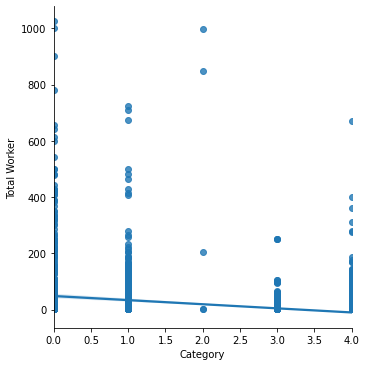

In [ ]:
sns.lmplot(x= 'Category' , y='Total Workers', data = df1, order=1)

plt.ylabel('Total Worker')
plt.xlabel('Category')
plt.show()

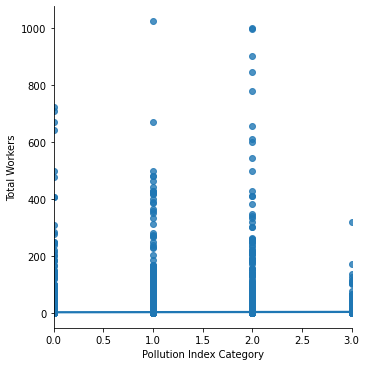

In [ ]:
sns.lmplot(x= 'Pollution Index Category' , y= 'Total Workers', data = df1, order=1)
plt.xlabel('Pollution Index Category')
plt.ylabel('Total Workers')
plt.show()

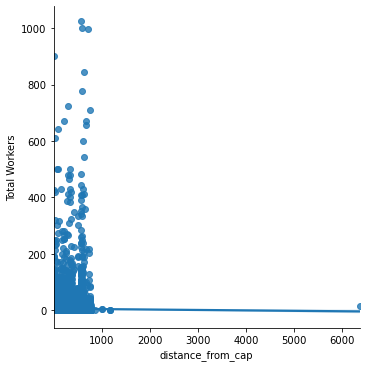

In [ ]:
sns.lmplot(x= 'distance_from_cap' , y= 'Total Workers', data = df1, order=1)
plt.xlabel('distance_from_cap')
plt.ylabel('Total Workers')
plt.show()

Checking Multi-Colinearity

<AxesSubplot:>

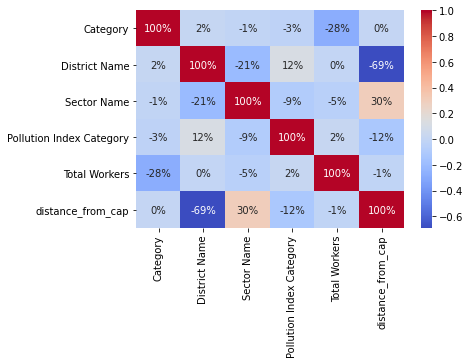

In [ ]:
#plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(), annot = True, cmap = 'coolwarm' ,fmt = '.0%')

Normality

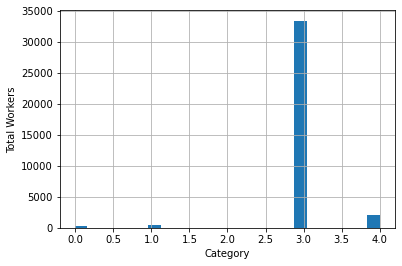

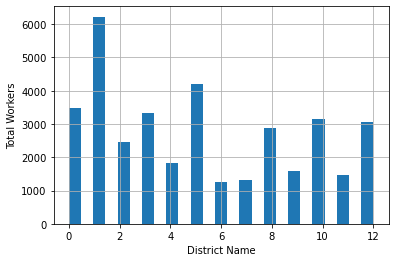

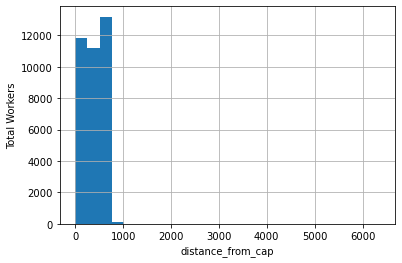

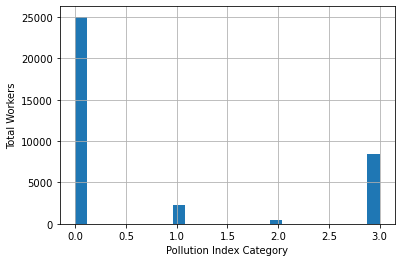

In [ ]:
cont_feature1 = {'Category', 'District Name', 'Pollution Index Category', 'distance_from_cap'}

for feature in cont_feature1:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Total Workers')
    plt.show()

(array([3.5952e+04, 1.2500e+02, 7.8000e+01, 2.7000e+01, 2.2000e+01,
        1.1000e+01, 9.0000e+00, 8.0000e+00, 9.0000e+00, 7.0000e+00,
        1.0000e+00, 2.0000e+00, 2.0000e+00, 3.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([1.0000e+00, 5.2250e+01, 1.0350e+02, 1.5475e+02, 2.0600e+02,
        2.5725e+02, 3.0850e+02, 3.5975e+02, 4.1100e+02, 4.6225e+02,
        5.1350e+02, 5.6475e+02, 6.1600e+02, 6.6725e+02, 7.1850e+02,
        7.6975e+02, 8.2100e+02, 8.7225e+02, 9.2350e+02, 9.7475e+02,
        1.0260e+03]),
 <BarContainer object of 20 artists>)

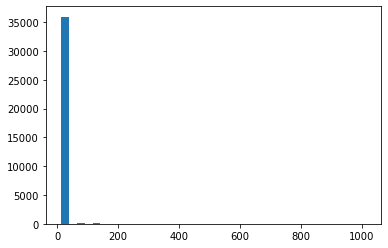

In [ ]:
plt.hist(df1['Total Workers'], bins = 20, rwidth = 0.5)

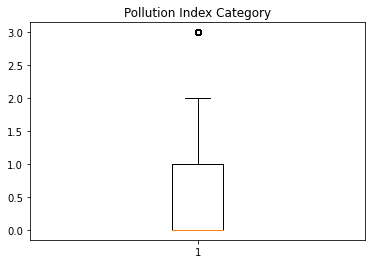

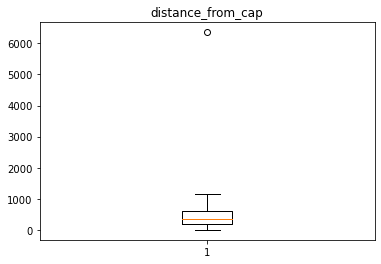

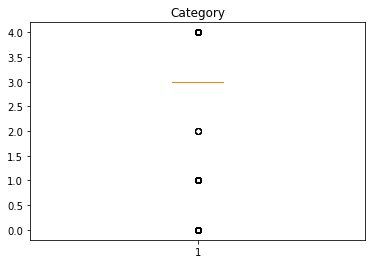

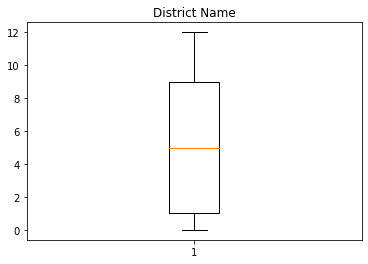

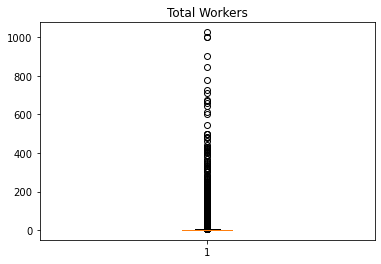

In [ ]:
cont_feature2 = {'Total Workers', 'Category', 'District Name', 'Pollution Index Category', 'distance_from_cap'}

for feature in cont_feature2:
    data=df.copy()
    plt.boxplot(data[feature])
    plt.title(feature)
    plt.show()


Homoscedasticity

In [ ]:
x = df1.drop(['Total Workers'], axis=1)

y = df1['Total Workers']
x.head()

,Category,District Name,Sector Name,Pollution Index Category,distance_from_cap
0,3,5,29,3.0,300.674442
1,3,1,29,0.0,662.730194
2,3,4,29,0.0,590.024981
3,3,4,29,3.0,588.929409
4,3,4,29,0.0,602.930016


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
reg = LinearRegression().fit(x, y)
pred = reg.predict(x)

error = y - pred
mse_LR = mean_squared_error(y , pred)
print('mse_LR of LR = ', mse_LR.round(3))

r2_score_LR = r2_score(y , pred)
print('r2_score of LR = ', r2_score_LR.round(3))

mse_LR of LR =  496.305
r2_score of LR =  0.08


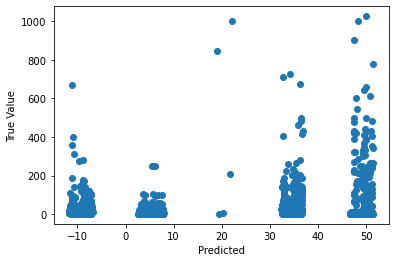

In [ ]:
plt.scatter(x= pred , y = y)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()


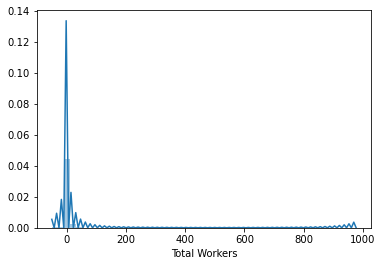

In [ ]:
sns.distplot(error)

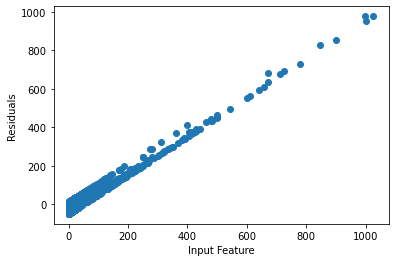

In [ ]:
plt.scatter(y = error, x = y)
plt.xlabel('Input Feature')
plt.ylabel('Residuals')
plt.show()

(array([5.1600e+02, 3.4598e+04, 8.6400e+02, 1.0400e+02, 6.4000e+01,
        2.8000e+01, 1.9000e+01, 1.0000e+01, 1.0000e+01, 8.0000e+00,
        4.0000e+00, 4.0000e+00, 1.1000e+01, 2.0000e+00, 5.0000e+00,
        2.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 3.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([-50.51618333, -16.2708584 ,  17.97446653,  52.21979146,
         86.46511638, 120.71044131, 154.95576624, 189.20109117,
        223.4464161 , 257.69174102, 291.93706595, 326.18239088,
        360.42771581, 394.67304073, 428.91836566, 463.16369059,
        497.40901552, 531.65434045, 565.89966537, 600.1449903 ,
        634.39031523, 668.63564016, 702.88096509, 737.12629001,
        771.37161494, 805.61693987, 839.8622648 , 874.10758973,
        908.35291465, 942.59823958, 976.84356451]),
 <a list of 30 Patch objects>)

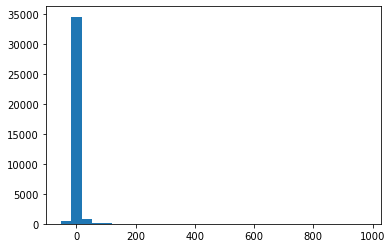

In [ ]:
plt.hist(error, bins=30)

((array([-4.11793331, -3.90870191, -3.794493  , ...,  3.794493  ,
          3.90870191,  4.11793331]),
  array([-50.51618333, -50.01001161, -49.82612541, ..., 951.77382363,
         976.2122757 , 976.84356451])),
 (9.552394627537574, -5.677995479256838e-15, 0.42854837636708787))

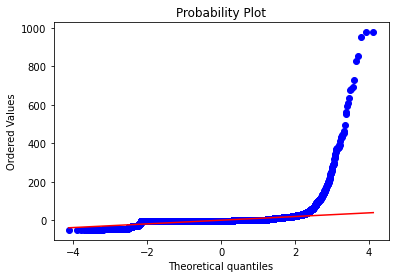

In [ ]:
# ploting Q-Q plot
from scipy import stats
stats.probplot(error , dist = 'norm', plot=plt)

In [ ]:
pip install statsmodels

In [ ]:
import statsmodels.api as sma
sma = sma.add_constant(x)
sma

import statsmodels.api as sm
m1 = sm.OLS(y, x).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Total Workers   R-squared (uncentered):                   0.043
Model:                            OLS   Adj. R-squared (uncentered):              0.042
Method:                 Least Squares   F-statistic:                              322.3
Date:                Thu, 04 Mar 2021   Prob (F-statistic):                        0.00
Time:                        18:06:09   Log-Likelihood:                     -1.6546e+05
No. Observations:               36263   AIC:                                  3.309e+05
Df Residuals:                   36258   BIC:                                  3.310e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Category                    -2.4500      0.149    -16.490      0.000      -2.741      -2.159
District Name                0.8537      0.039     21.805      0.000       0.777       0.930
Sector Name                  0.0149      0.013      1.175      0.240      -0.010       0.040
Pollution Index Category     0.7978      0.097      8.247      0.000       0.608       0.987
distance_from_cap            0.0150      0.001     21.428      0.000       0.014       0.016
==============================================================================
Omnibus:                    82971.566   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        682687439.727
Skew:                          22.231   Prob(JB):                         0.00
Kurtosis:                     673.707   Cond. No.                         562.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# VIF starts at 1 and has no upper limit
# VIF = 1, no correlation between the independent variable and the other variables
# VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(x):
    
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

    return(vif)
calc_vif(x)

,variables,VIF
0,Category,13.716002
1,District Name,4.381549
2,Sector Name,5.204599
3,Pollution Index Category,1.400474
4,distance_from_cap,6.701378


In [ ]:
#normality distribution   
#kolmogorov-smirnov

resids = m1.resid
stats.kstest(resids,"norm")

KstestResult(statistic=0.4368762357039849, pvalue=0.0)

In [ ]:
stats.kstest(error,"norm")

KstestResult(statistic=0.6141255067417257, pvalue=0.0)

In [ ]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
# homoscedasticity check, p>0.05
#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(m1.resid, m1.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 306.4812488667232),
 ('p-value', 4.3315285369263006e-65),
 ('f-value', 61.81019468721214),
 ('f p-value', 2.15484963884908e-64)]

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([0.04085673, 0.05424408, 0.05118023, 0.04759898, 0.05541103,
        0.04900425, 0.04921186, 0.04266963, 0.04989151, 0.12538646,
        1.        , 0.12538646, 0.04989151, 0.04266963, 0.04921186,
        0.04900425, 0.05541103, 0.04759898, 0.05118023, 0.05424408,
        0.04085673]),
 <matplotlib.lines.Line2D at 0x160ee8b7080>)

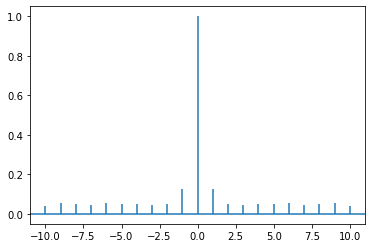

In [ ]:
plt.acorr(error, maxlags = 10)

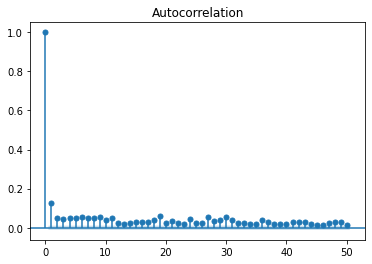

In [ ]:
#auto correlation
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(error, lags = 50)
plt.show()


In [ ]:
#durbin watson for Independence / Auto correlation of residuals
import statsmodels
statsmodels.stats.stattools.durbin_watson(error, axis=0)

1.7490473020793003

In [ ]:
# The test will output values between 0 and 4. Here are how to interpret the results of the test:
#value = 2 means that there is no autocorrelation in the sample,
#values < 2 indicate positive autocorrelation,
#values > 2 negative autocorrelation.

In [ ]:
# Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x, y)

feat_importances = pd.Series(model.feature_importances_,index= x.columns)
feat_importances

Category                    0.225568
District Name               0.096568
Sector Name                 0.190761
Pollution Index Category    0.136491
distance_from_cap           0.350611
dtype: float64

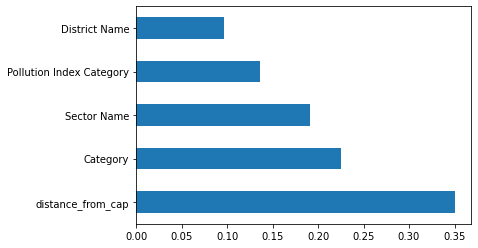

In [ ]:
feat_importances.nlargest().plot(kind='barh')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#df1 = pd.DataFrame(sc.fit_transform(df1), columns = df1.columns)
#X_test = pd.DataFrame(sc.transform(X_test))
df1.head()

,Category,District Name,Sector Name,Pollution Index Category,Total Workers,distance_from_cap
0,3,5,29,3.0,1.0,300.674442
1,3,1,29,0.0,1.0,662.730194
2,3,4,29,0.0,4.0,590.024981
3,3,4,29,3.0,1.0,588.929409
4,3,4,29,0.0,1.0,602.930016


In [ ]:
# Sector name and distance_from_cap are removed based on coef values
x = df1.drop(['Sector Name', 'distance_from_cap', 'Total Workers'], axis=1)

y = df1['Total Workers']

x.head()

,Category,District Name,Pollution Index Category
0,3,5,3.0
1,3,1,0.0
2,3,4,0.0
3,3,4,3.0
4,3,4,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.25, 
                                                    random_state=50)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((27197, 3), (9066, 3), (27197,), (9066,))

In [ ]:
list(X_train)

['Category', 'District Name', 'Pollution Index Category']

In [ ]:
X_train = pd.DataFrame(sc.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(sc.transform(X_test), columns = X_test.columns)
X_train.head()

,Category,District Name,Pollution Index Category
0,-0.00827,-0.813049,1.748621
1,-0.00827,-0.559165,-0.625917
2,-0.00827,1.218019,-0.625917
3,-0.00827,1.725786,1.748621
4,-0.00827,0.710252,1.748621


In [ ]:
reg = LinearRegression()
reg = reg.fit(X_train, y_train)

lr_y_pred_train = reg.predict(X_train)
lr_y_pred_test = reg.predict(X_test)

lr_mse_train = mean_squared_error(y_train, lr_y_pred_train)
print("MSE", lr_mse_train.round(3))

lr_mse_test = mean_squared_error(y_test, lr_y_pred_test)
print("MSE", lr_mse_test.round(3))

lr_r2_train = r2_score(y_train, lr_y_pred_train)
print("r2_score", lr_r2_train.round(3))

lr_r2_test = r2_score(y_test, lr_y_pred_test)
print("r2_score", lr_r2_test.round(3))

MSE 537.048
MSE 381.817
r2_score 0.071
r2_score 0.105


In [ ]:
rid_r = Ridge(alpha = 0.001).fit(X_train, y_train)

y_pred_train_rid = rid_r.predict(X_train)
y_pred_test_rid = rid_r.predict(X_test)

rid_mse_train = mean_squared_error(y_train, y_pred_train_rid)
print("Mse of RR on Test data",rid_mse_train.round(3))

rid_mse_test = mean_squared_error(y_test, y_pred_test_rid)
print("Mse of RR on Test data",rid_mse_test.round(3))

rid_r2_train = r2_score(y_train, y_pred_train_rid)
print("R2_score of RR on Test data", rid_r2_train.round(3))

rid_r2_test = r2_score(y_test, y_pred_test_rid)
print("R2_score of RR on Test data", rid_r2_test.round(3))


Mse of RR on Test data 537.048
Mse of RR on Test data 381.817
R2_score of RR on Test data 0.071
R2_score of RR on Test data 0.105


In [ ]:
dt = DecisionTreeRegressor()

dt.fit(X_train, y_train)

dt.tree_.node_count
dt.tree_.max_depth

print(f"Decision tree has {dt.tree_.node_count} nodes with maximum depth covered up to {dt.tree_.max_depth}")


Decision tree has 387 nodes with maximum depth covered up to 14


In [ ]:
max_depth = [int(x) for x in np.linspace(start = 1, stop = 20, num = 20)]

min_samples_split = [2, 3, 4, 5, 6, 7, 8, 10, ]

min_samples_leaf = [1, 2, 5, 10]

random_state = [1, 5, 10, 20, 50]

tree_para = {
            'criterion':['mse'],
            'max_features' : ['auto'],
            'max_depth' : max_depth,
            'min_samples_split' : min_samples_split,
            'min_samples_leaf' : min_samples_leaf,
            'random_state' : random_state
            }


gridcv = GridSearchCV(dt, tree_para, cv=5)
gridcv.fit(X_train, y_train)

print(gridcv.best_score_)
print(gridcv.best_params_)

0.3203715928667554
{'criterion': 'mse', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 1}


In [ ]:
dt1 = DecisionTreeRegressor(
                                criterion = 'mse',
                                min_samples_split = 2,
                                min_samples_leaf = 2,
                                max_features = 'auto',
                                max_depth = 5,
                                random_state = 1
                                )

dt1.fit(X_train, y_train)

dt_y_pred_train = dt1.predict(X_train)
dt_y_pred_dt_test = dt1.predict(X_test)

dt_mse_train = mean_squared_error(y_train, dt_y_pred_train)
print("Mse of DT on Train data", dt_mse_train.round(3))

dt_mse_test = mean_squared_error(y_test, dt_y_pred_dt_test)
print("Mse of DT on Test data", dt_mse_test.round(3))

dt_r2_train = r2_score(y_train, dt_y_pred_train)
print("R2_score of DT on Train data", dt_r2_train.round(3))

dt_r2_test = r2_score(y_test, dt_y_pred_dt_test)
print("R2_score of DT on Test data", dt_r2_test.round(3))

print(f"Decision tree has {dt1.tree_.node_count} nodes with maximum depth covered up to {dt1.tree_.max_depth}")


Mse of DT on Train data 373.654
Mse of DT on Test data 310.823
R2_score of DT on Train data 0.354
R2_score of DT on Test data 0.271
Decision tree has 49 nodes with maximum depth covered up to 5


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

max_features = ['auto']

max_depth = [int(x) for x in np.linspace(start = 1, stop = 20, num = 20)]

min_samples_split = [2, 3, 4, 5, 6, 7, 8, 10, ]

min_samples_leaf = [1, 2, 5, 10]

random_state = [1, 5, 10, 20, 50]

from sklearn.model_selection import RandomizedSearchCV

random_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf,
               'random_state' : random_state
               }

print(random_grid)

rf = RandomizedSearchCV(estimator= RandomForestRegressor(), param_distributions = random_grid, scoring= 'neg_mean_squared_error', n_iter = 10, cv = 5, verbose=5, n_jobs=1)
rf

rf.fit(X_train, y_train)

print("Best score", rf.best_score_)
print("Best parameters", rf.best_params_)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 10], 'min_samples_leaf': [1, 2, 5, 10], 'random_state': [1, 5, 10, 20, 50]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] random_state=10, n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=19 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  random_state=10, n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=19, score=-497.457, total=  22.0s
[CV] random_state=10, n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=19 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.9s remaining:    0.0s


[CV]  random_state=10, n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=19, score=-486.457, total=  26.2s
[CV] random_state=10, n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=19 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   48.1s remaining:    0.0s


[CV]  random_state=10, n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=19, score=-351.721, total=  22.4s
[CV] random_state=10, n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=19 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.2min remaining:    0.0s


[CV]  random_state=10, n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=19, score=-389.601, total=  23.6s
[CV] random_state=10, n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=19 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.6min remaining:    0.0s


[CV]  random_state=10, n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=19, score=-319.750, total=  19.7s
[CV] random_state=10, n_estimators=1200, min_samples_split=3, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  random_state=10, n_estimators=1200, min_samples_split=3, min_samples_leaf=1, max_features=auto, max_depth=20, score=-471.731, total=  23.1s
[CV] random_state=10, n_estimators=1200, min_samples_split=3, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  random_state=10, n_estimators=1200, min_samples_split=3, min_samples_leaf=1, max_features=auto, max_depth=20, score=-492.267, total=  23.1s
[CV] random_state=10, n_estimators=1200, min_samples_split=3, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  random_state=10, n_estimators=1200, min_samples_split=3, min_samples_leaf=1, max_features=auto, max_depth=20, score=-361.620, total=  22.8s
[CV] random_state=10, n_estimators=1200, min_samples_split=3, min_sampl

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  7.7min finished


Best score -405.3608551835433
Best parameters {'random_state': 10, 'n_estimators': 1200, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20}


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf1 = RandomForestRegressor(
                             n_estimators = 1200, 
                             min_samples_split = 3,
                             min_samples_leaf = 1,
                             max_features = 'auto',
                             max_depth = 20,
                             random_state = 10
                            )

rfr = rf1.fit(X_train, y_train)

rf_Y_pred_train = rfr.predict(X_train)

rf_Y_pred_test = rfr.predict(X_test)

rf_mse_train = mean_squared_error(y_train, rf_Y_pred_train)
print("Mse of RFR on Trained data", rf_mse_train.round(3))

rf_mse_test = mean_squared_error(y_test, rf_Y_pred_test)
print("Mse of RFR on Test data", rf_mse_test.round(3))

rf_r2_train = r2_score(y_train, rf_Y_pred_train)
print("R2_score of RFR on Trained data", rf_r2_train.round(3))

rf_r2_test = r2_score(y_test, rf_Y_pred_test)
print("R2_score of RFR on Test data", rf_r2_test.round(3))


Mse of RFR on Trained data 311.285
Mse of RFR on Test data 287.798
R2_score of RFR on Trained data 0.462
R2_score of RFR on Test data 0.325


In [ ]:
df1['zscore'] = (df1['Total Workers'] - df1['Total Workers'].mean()) / df1['Total Workers'].std()
df1.head()

,Category,District Name,Sector Name,Pollution Index Category,Total Workers,distance_from_cap,zscore
0,3,5,29,3.0,1.0,300.674442,-0.155769
1,3,1,29,0.0,1.0,662.730194,-0.155769
2,3,4,29,0.0,4.0,590.024981,-0.026721
3,3,4,29,3.0,1.0,588.929409,-0.155769
4,3,4,29,0.0,1.0,602.930016,-0.155769


In [ ]:
upper_zscore = df1.zscore.mean() + 3 * df1.zscore.std()
upper_zscore

2.9999999999996247

In [ ]:
df1[df1.zscore > upper_zscore].shape

(242, 7)

In [ ]:
df1.loc[df1.zscore> 3, 'zscore'] = 3
df1.zscore.describe().round(1)

count    36263.0
mean        -0.0
std          0.3
min         -0.2
25%         -0.2
50%         -0.1
75%         -0.1
max          3.0
Name: zscore, dtype: float64

In [ ]:
z = df1.zscore
z

0       -0.155769
1       -0.155769
2       -0.026721
3       -0.155769
4       -0.155769
           ...   
36258    0.016295
36259   -0.112753
36260   -0.155769
36261   -0.155769
36262    3.000000
Name: zscore, Length: 36263, dtype: float64

In [ ]:
X1_train, X1_test, z_train, z_test = train_test_split(x, z, 
                                                    test_size=0.25, 
                                                    random_state=50)
X1_train.shape, X1_test.shape, z_train.shape, z_test.shape


((27197, 3), (9066, 3), (27197,), (9066,))

In [ ]:
X1_train = pd.DataFrame(sc.fit_transform(X1_train), columns = X1_train.columns)
X1_test = pd.DataFrame(sc.transform(X1_test), columns = X1_test.columns)
X1_train.head()

,Category,District Name,Pollution Index Category
0,-0.00827,-0.813049,1.748621
1,-0.00827,-0.559165,-0.625917
2,-0.00827,1.218019,-0.625917
3,-0.00827,1.725786,1.748621
4,-0.00827,0.710252,1.748621


In [ ]:
reg = LinearRegression()
reg = reg.fit(X1_train, z_train)

lr_z_pred_train = reg.predict(X1_train)
lr_z_pred1_test = reg.predict(X1_test)

lr_mse_train_z = mean_squared_error(z_train, lr_z_pred_train)
print("MSE of LR on Training data", lr_mse_train_z.round(3))

lr_mse_test_z = mean_squared_error(z_test, lr_z_pred1_test)
print("MSE of LR on Test data", lr_mse_test_z.round(3))

lr_r2_train_z = r2_score(z_train, lr_z_pred_train)
print("R2_score of LR on Train data", lr_r2_train_z.round(3))

lr_r2_test_z = r2_score(z_test, lr_z_pred1_test)
print("R2_score of LR on Test data", lr_r2_test_z.round(3))

MSE of LR on Training data 0.103
MSE of LR on Test data 0.099
R2_score of LR on Train data 0.05
R2_score of LR on Test data 0.069


In [ ]:
rid_z = Ridge(alpha = 0.001).fit(X1_train, z_train)

z_pred_train_rid = rid_z.predict(X1_train)
z_pred_test_rid = rid_z.predict(X1_test)

rid_mse_train_z = mean_squared_error(z_train, z_pred_train_rid)
print("Mse of RR on Test data",rid_mse_train_z.round(3))

rid_mse_test_z = mean_squared_error(z_test, z_pred_test_rid)
print("Mse of RR on Test data",rid_mse_test_z.round(3))

rid_r2_train_z = r2_score(z_train, z_pred_train_rid)
print("R2_score of RR on Test data", rid_r2_train_z.round(3))

rid_r2_test_z = r2_score(z_test, z_pred_test_rid)
print("R2_score of RR on Test data", rid_r2_test_z.round(3))


Mse of RR on Test data 0.103
Mse of RR on Test data 0.099
R2_score of RR on Test data 0.05
R2_score of RR on Test data 0.069


In [ ]:
dt_z = DecisionTreeRegressor()

dt_z.fit(X1_train, z_train)

dt_z.tree_.node_count
dt_z.tree_.max_depth

print(f"Decision tree has {dt_z.tree_.node_count} nodes with maximum depth covered up to {dt_z.tree_.max_depth}")

Decision tree has 387 nodes with maximum depth covered up to 13


In [ ]:
max_depth = [int(x) for x in np.linspace(start = 1, stop = 20, num = 20)]

min_samples_split = [2, 3, 4, 5, 6, 7, 8, 10, ]

min_samples_leaf = [1, 2, 5, 10]

random_state = [1, 5, 10, 20, 50]

tree_para_z = {
            'criterion':['mse'],
            'max_features' : ['auto'],
            'max_depth' : max_depth,
            'min_samples_split' : min_samples_split,
            'min_samples_leaf' : min_samples_leaf,
            'random_state' : random_state
            }


clf_z = GridSearchCV(dt, tree_para_z, cv=5)
clf_z.fit(X1_train, z_train)

print(clf_z.best_score_)
print(clf_z.best_params_)

0.38111784142054866
{'criterion': 'mse', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 2, 'random_state': 1}


In [ ]:
dt1_z = DecisionTreeRegressor(
                                criterion = 'mse',
                                min_samples_split = 2,
                                min_samples_leaf = 10,
                                max_features = 'auto',
                                max_depth = 5,
                                random_state = 1
                                )

dt1_z.fit(X1_train, z_train)

dt_z_pred_train = dt1_z.predict(X1_train)
dt_z_pred_test = dt1_z.predict(X1_test)

dt_mse_train_z = mean_squared_error(z_train, dt_z_pred_train)
print("Mse of DT on Train data", dt_mse_train_z.round(3))

dt_mse_test_z = mean_squared_error(z_test, dt_z_pred_test)
print("Mse of DT on Test data", dt_mse_test_z.round(3))

dt_r2_train_z = r2_score(z_train, dt_z_pred_train)
print("R2_score of DT on Train data", dt_r2_train_z.round(3))

dt_r2_test_z = r2_score(z_test, dt_z_pred_test)
print("R2_score of DT on Test data", dt_r2_test_z.round(3))

print(f"Decision tree has {dt1_z.tree_.node_count} nodes with maximum depth covered up to {dt1_z.tree_.max_depth}")


Mse of DT on Train data 0.064
Mse of DT on Test data 0.056
R2_score of DT on Train data 0.407
R2_score of DT on Test data 0.471
Decision tree has 61 nodes with maximum depth covered up to 5


In [ ]:
rf_z = RandomForestRegressor()

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

max_features = ['auto']

max_depth = [int(x) for x in np.linspace(start = 1, stop = 20, num = 20)]

min_samples_split = [2, 3, 4, 5, 6, 7, 8, 10, ]

min_samples_leaf = [1, 2, 5, 10]

random_state = [1, 5, 10, 20, 50]

from sklearn.model_selection import RandomizedSearchCV

random_grid_z = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf,
               'random_state' : random_state
               }

print(random_grid_z)

rf_z = RandomizedSearchCV(estimator= RandomForestRegressor(), param_distributions = random_grid_z, scoring= 'neg_mean_squared_error', n_iter = 10, cv = 5, verbose=5, n_jobs=1)
rf_z

rf_z.fit(X1_train, z_train)

print("Best score", rf_z.best_score_)
print("Best parameters", rf_z.best_params_)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 10], 'min_samples_leaf': [1, 2, 5, 10], 'random_state': [1, 5, 10, 20, 50]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] random_state=1, n_estimators=200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=3 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  random_state=1, n_estimators=200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=3, score=-0.074, total=   2.3s
[CV] random_state=1, n_estimators=200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV]  random_state=1, n_estimators=200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=3, score=-0.077, total=   2.2s
[CV] random_state=1, n_estimators=200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=3 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.5s remaining:    0.0s


[CV]  random_state=1, n_estimators=200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=3, score=-0.065, total=   2.4s
[CV] random_state=1, n_estimators=200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=3 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.9s remaining:    0.0s


[CV]  random_state=1, n_estimators=200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=3, score=-0.065, total=   2.4s
[CV] random_state=1, n_estimators=200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=3 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    9.3s remaining:    0.0s


[CV]  random_state=1, n_estimators=200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=3, score=-0.066, total=   2.4s
[CV] random_state=10, n_estimators=900, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=17 
[CV]  random_state=10, n_estimators=900, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=17, score=-0.074, total=  16.5s
[CV] random_state=10, n_estimators=900, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=17 
[CV]  random_state=10, n_estimators=900, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=17, score=-0.073, total=  16.9s
[CV] random_state=10, n_estimators=900, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=17 
[CV]  random_state=10, n_estimators=900, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=17, score=-0.064, total=  16.5s
[CV] random_state=10, n_estimators=900, min_samples_split=5, min_samples_leaf=1, max_fea

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  9.6min finished


Best score -0.06691336864613734
Best parameters {'random_state': 1, 'n_estimators': 700, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 6}


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf1 = RandomForestRegressor(
                             n_estimators = 700, 
                             min_samples_split = 8,
                             min_samples_leaf = 1,
                             max_features = 'auto',
                             max_depth = 6,
                             random_state = 1
                            )

rfr_z = rf1.fit(X1_train, z_train)

rf_z_pred_train = rfr_z.predict(X1_train)

rf_z_pred_test = rfr_z.predict(X1_test)

rf_mse_train_z = mean_squared_error(z_train, rf_z_pred_train)
print("Mse of RFR on Trained data", rf_mse_train_z.round(3))

rf_mse_test_z = mean_squared_error(z_test, rf_z_pred_test)
print("Mse of RFR on Test data", rf_mse_test_z.round(3))

rf_r2_train_z = r2_score(z_train, rf_z_pred_train)
print("R2_score of RFR on Trained data", rf_r2_train_z.round(3))

rf_r2_test_z = r2_score(z_test, rf_z_pred_test)
print("R2_score of RFR on Test data", rf_r2_test_z.round(3))


Mse of RFR on Trained data 0.062
Mse of RFR on Test data 0.057
R2_score of RFR on Trained data 0.43
R2_score of RFR on Test data 0.469
